In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from CaltransTab import *

In [7]:
def ca_cty():
    for i in county['County']:
        miles = hwymiles(i)
        traffic = VMT(i)
        window = 3
        traffic['Moving Average'] = traffic['Total DVMT'].rolling(window=window, center=True).mean()
        county_file_name = county[county['County']==i]['FileName'].values[0]
        pop = pd.read_excel(f'cty_pop/{county_file_name}.xls').iloc[41:]['Unnamed: 1'].reset_index(drop=True).to_frame().astype(float).rename(columns={'Unnamed: 1': 'Population'}).iloc[:-1]
        pop['Year'] = np.arange(2001, 2023)

        if miles.loc[miles['Year'] == 2001, 'City Roads'].values[0] != 0:
            miles['City % Change'] = (miles['City Roads'] / miles.loc[miles['Year'] == 2001, 'City Roads'].values[0] - 1)
        else:
            miles['City % Change'] = np.nan

        miles['Highway % Change'] = (miles['State Highway'] / miles.loc[miles['Year'] == 2001, 'State Highway'].values[0] - 1)
        # miles['City % Change'] = (miles['City Roads'] / miles.loc[miles['Year'] == 2001, 'City Roads'].values[0] - 1)
        # miles['County % Change'] = (miles['County Roads'] / miles.loc[miles['Year'] == 2001, 'County Roads'].values[0] - 1)
        traffic['% Change'] = (traffic['Total DVMT'] / traffic.loc[traffic['Year'] == 2001, 'Total DVMT'].values[0] - 1)
        traffic['Moving Average %'] = (traffic['Moving Average'] / traffic.loc[traffic['Year'] == 2002, 'Moving Average'].values[0] - 1)
        pop['% Change'] = (pop['Population'] / pop.loc[pop['Year'] == 2001, 'Population'].values[0] - 1)

        plt.figure(figsize=(15, 8))
        #plt.plot(traffic['Year'], traffic['% Change'], label=f'{i} VMT')
        plt.plot(traffic['Year'], traffic['Moving Average %'], label='VMT')
        plt.plot(pop['Year'], pop['% Change'], label='Population')
        plt.plot(miles['Year'], miles['Highway % Change'], label='Highway Miles')
        plt.plot(miles['Year'], miles['City % Change'], label='City Miles')
        # plt.plot(miles['Year'], miles['County % Change'], label='County Miles')

        plt.xlabel('Year')
        plt.ylabel('Percentage Change')
        plt.title(f'{i} County')
        plt.legend()
        # plt.ylim(-0.25, 0.4)
        plt.grid()
        plt.minorticks_on()
        plt.axhline(y=0, color='gray', linestyle='--')
        plt.show()

In [3]:
def ca_cty():
    num_rows = 10
    num_cols = 6
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(50, 35))
    axs = axs.ravel()  # Flatten the array of axes to make indexing easier

    for idx, i in enumerate(county['County']):
        miles = hwymiles(i)
        traffic = VMT(i)
        window = 3
        traffic['Moving Average'] = traffic['Total DVMT'].rolling(window=window, center=True).mean()
        county_file_name = county[county['County']==i]['FileName'].values[0]
        pop = pd.read_excel(f'cty_pop/{county_file_name}.xls').iloc[41:]['Unnamed: 1'].reset_index(drop=True).to_frame().astype(float).rename(columns={'Unnamed: 1': 'Population'}).iloc[:-1]
        pop['Year'] = np.arange(2001, 2023)

        if miles.loc[miles['Year'] == 2001, 'City Roads'].values[0] != 0:
            miles['City % Change'] = (miles['City Roads'] / miles.loc[miles['Year'] == 2001, 'City Roads'].values[0] - 1)
        else:
            miles['City % Change'] = np.nan

        miles['Highway % Change'] = (miles['State Highway'] / miles.loc[miles['Year'] == 2001, 'State Highway'].values[0] - 1)
        # miles['City % Change'] = (miles['City Roads'] / miles.loc[miles['Year'] == 2001, 'City Roads'].values[0] - 1)
        # miles['County % Change'] = (miles['County Roads'] / miles.loc[miles['Year'] == 2001, 'County Roads'].values[0] - 1)
        traffic['% Change'] = (traffic['Total DVMT'] / traffic.loc[traffic['Year'] == 2001, 'Total DVMT'].values[0] - 1)
        traffic['Moving Average %'] = (traffic['Moving Average'] / traffic.loc[traffic['Year'] == 2002, 'Moving Average'].values[0] - 1)
        pop['% Change'] = (pop['Population'] / pop.loc[pop['Year'] == 2001, 'Population'].values[0] - 1)

        axs[idx].plot(traffic['Year'], traffic['Moving Average %'])
        axs[idx].plot(pop['Year'], pop['% Change'])
        axs[idx].plot(miles['Year'], miles['Highway % Change'])
        axs[idx].plot(miles['Year'], miles['City % Change'])
        # axs[idx].plot(miles['Year'], miles['County % Change'])

        # axs[idx].set_xlabel('Year')
        # axs[idx].set_ylabel('Percentage Change')
        axs[idx].set_title(f'{i} County')
        axs[idx].grid()
        axs[idx].minorticks_on()
        axs[idx].axhline(y=0, color='gray', linestyle='--')

    plt.tight_layout()
    plt.show()


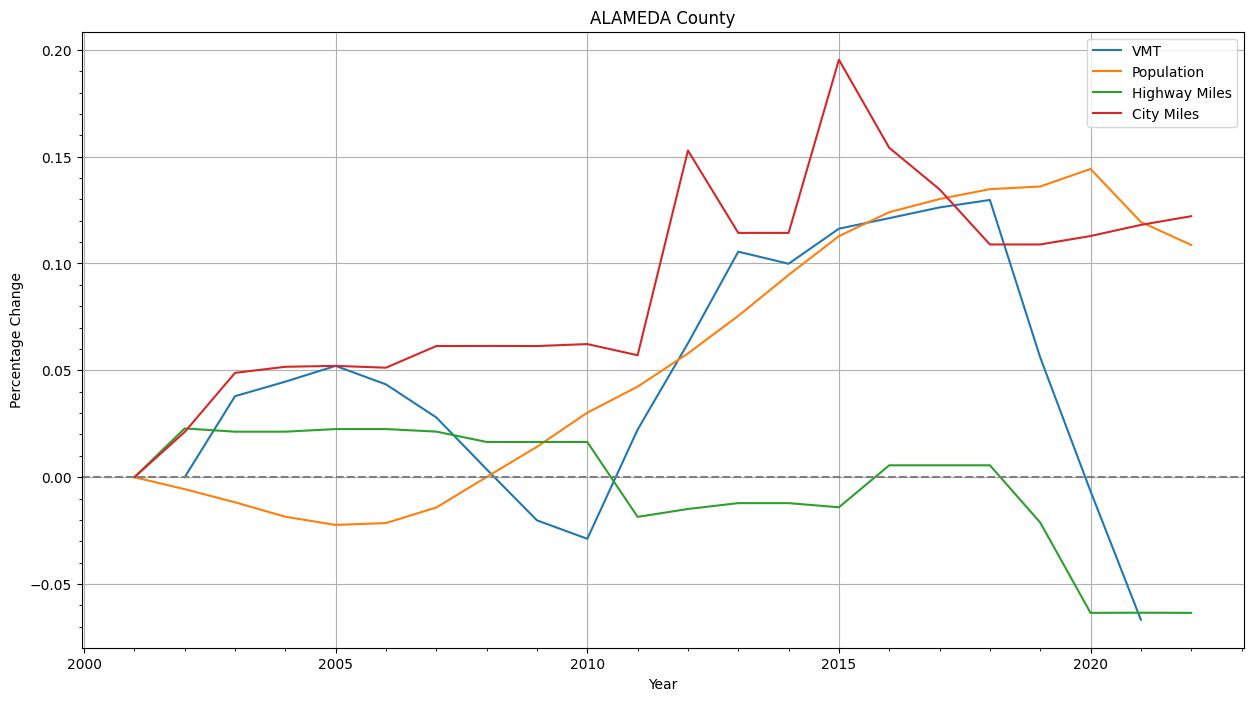

KeyboardInterrupt: 

In [8]:
ca_cty()

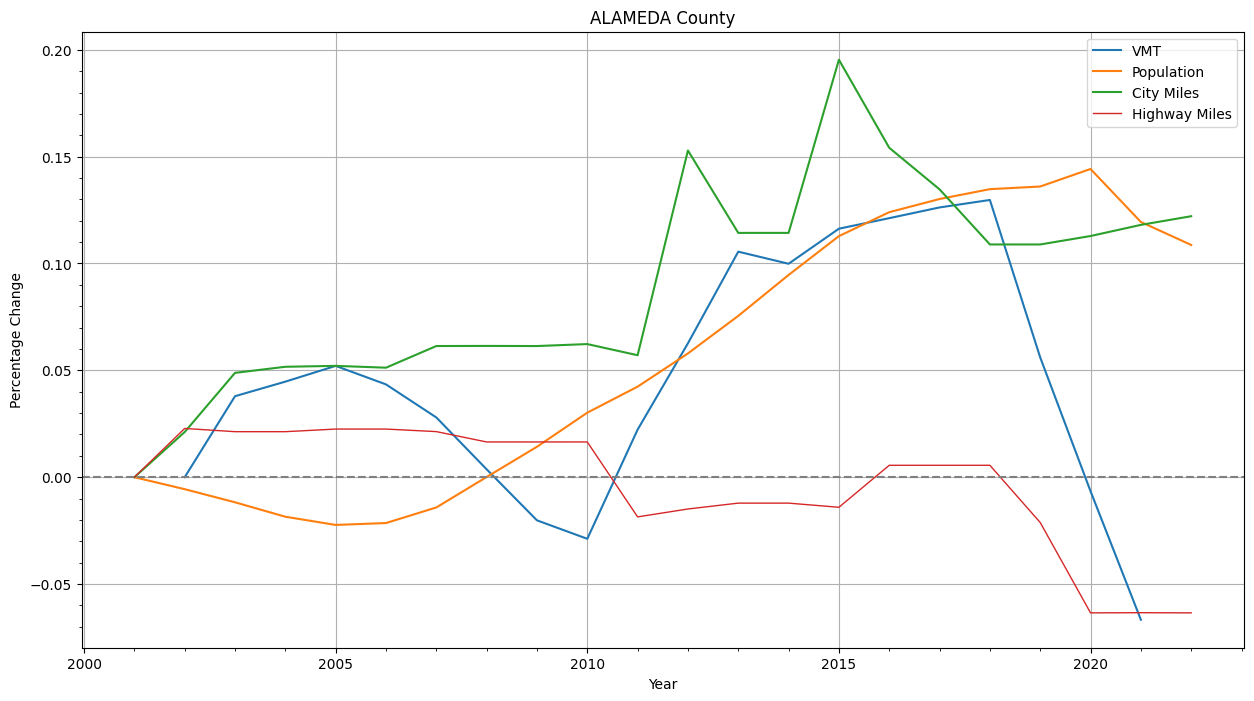

In [5]:
i = 'ALAMEDA'

miles = hwymiles(i)
traffic = VMT(i)
window = 3
traffic['Moving Average'] = traffic['Total DVMT'].rolling(window=window, center=True).mean()
county_file_name = county[county['County']==i]['FileName'].values[0]
pop = pd.read_excel(f'cty_pop/{county_file_name}.xls').iloc[41:]['Unnamed: 1'].reset_index(drop=True).to_frame().astype(float).rename(columns={'Unnamed: 1': 'Population'}).iloc[:-1]
pop['Year'] = np.arange(2001, 2023)

miles['Highway % Change'] = (miles['State Highway'] / miles.loc[miles['Year'] == 2001, 'State Highway'].values[0] - 1)
miles['City % Change'] = (miles['City Roads'] / miles.loc[miles['Year'] == 2001, 'City Roads'].values[0] - 1)
# miles['County % Change'] = (miles['County Roads'] / miles.loc[miles['Year'] == 2001, 'County Roads'].values[0] - 1)
traffic['% Change'] = (traffic['Total DVMT'] / traffic.loc[traffic['Year'] == 2001, 'Total DVMT'].values[0] - 1)
traffic['Moving Average %'] = (traffic['Moving Average'] / traffic.loc[traffic['Year'] == 2002, 'Moving Average'].values[0] - 1)
pop['% Change'] = (pop['Population'] / pop.loc[pop['Year'] == 2001, 'Population'].values[0] - 1)

plt.figure(figsize=(15, 8))
#plt.plot(traffic['Year'], traffic['% Change'], label=f'{i} VMT')
plt.plot(traffic['Year'], traffic['Moving Average %'], label='VMT')
plt.plot(pop['Year'], pop['% Change'], label='Population')
plt.plot(miles['Year'], miles['City % Change'], label='City Miles')
plt.plot(miles['Year'], miles['Highway % Change'], label='Highway Miles', linewidth = 1)
# plt.plot(miles['Year'], miles['County % Change'], label='County Miles')

plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title(f'{i} County')
plt.legend()
# plt.ylim(-0.25, 0.4)
plt.grid()
plt.minorticks_on()
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()

In [6]:
## Joel: The next thing to explore is the VMT generated from highway miles / city miles. Is it the city VMT that is pulling all the increase?
## Ie. are highway VMT actually stagnant?